
# Credit Card Fraud Detection Project


This project is about finding fraudulent transactions using machine learning. The dataset has credit card transactions, and our goal is to train models to spot fraud. The data comes from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) and has anonymized transaction details labeled as fraud or not fraud.

### Project Goals
1. Explore the dataset to understand its structure and main features.
2. Create graphs to see the differences between fraud and non-fraud transactions.
3. Fix the data imbalance and prepare it for modeling.
4. Train and test models to classify transactions as fraud or not fraud.

### Dataset Description
The dataset has anonymized data to keep it confidential. Each row is a transaction with these key features:
- **Time:** How long after the first transaction this happened.
- **V1, V2, ..., V28:** Features made with PCA to reduce dimensions.
- **Amount:** The amount of money in the transaction.
- **Class:** The label: `1` means fraud, `0` means it's a normal transaction.




### Import Necessary Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



### Load the Dataset

The code extracts a ZIP file containing the dataset, verifies the extraction by listing the files, loads the creditcard.csv file into a pandas DataFrame, and displays the first 10 rows for initial inspection. This ensures that the dataset is correctly prepared for further analysis.


In [3]:

# Load the dataset
import zipfile
import os
with zipfile.ZipFile("C:\\Users\\IntelliBoard\\Downloads\\archive(2).zip", 'r') as zip_ref:
    zip_ref.extractall('/content/')
extracted_files = os.listdir('/content/')
print(extracted_files)

# Display the first rows of the dataset
import pandas as pd
data = pd.read_csv('/content/creditcard.csv')
data.head(10)


['creditcard.csv']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**Result:**


The extracted file list confirms the successful extraction of creditcard.csv. The dataset preview reveals key columns:

Time (elapsed time since the first transaction),
V1 to V28 (PCA-anonymized features),
Amount (transaction value),
Class (fraud indicator: 1 = fraud, 0 = non-fraud).
The dataset is ready for preprocessing and analysis.

**Statistical summary of the dataset's numerical columns** 

It computes metrics such as count, mean, standard deviation, minimum, maximum, and quartile values (25%, 50%, 75%) for each column. This step helps to understand the overall distribution and variability of the data.

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**The data.info() function**

This step helps evaluate the structure and completeness of the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Result:**

All columns are complete with no missing values.


### Clean the Data


**Check for Missing Values**

To ensure data quality, we start by checking if there are any missing values in the dataset. Missing values can affect the performance of machine learning models, so it's crucial to handle them properly.


In [33]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()  # Counts the number of missing (NaN) values in each column

# Print the result for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Result:**

The output confirms that there are no missing values in any column of the dataset. Each column, including Time, V1 to V28, Amount, and Class, has a count of 0 missing values. This ensures that no additional data cleaning for missing values is required, and the dataset is ready for further analysis.


**Check for Duplicate Rows**

In this step, we will address duplicate rows in the dataset. Duplicate entries can impact analysis and model performance, so they require careful handling. However, we plan to retain fraudulent duplicates (where Class == 1) because they may contain valuable patterns or insights into repeated fraudulent behavior, which are crucial for building an effective fraud detection model. Non-fraudulent duplicates (where Class == 0), on the other hand, will be removed to ensure the dataset remains clean while preserving important information for fraud analysis.

Here’s how duplicates were handled:

1. **Identify Total Duplicates:** Count all duplicate rows in the dataset.
2. **Fraudulent Duplicates:** Count and analyze duplicate rows where `Class == 1` (fraudulent).
3. **Non-Fraudulent Duplicates:** Count and analyze duplicate rows where `Class == 0` (non-fraudulent).
4. **Remove Non-Fraudulent Duplicates:** Exclude only non-fraudulent duplicates to retain potentially valuable information from fraudulent duplicates.

In [11]:

# Identify and count duplicate rows
total_duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {total_duplicates}") 


Total duplicate rows: 1081


In [12]:

# Count and analyze fraudulent duplicates (Class == 1)
fraud_duplicates_count = data[(data.duplicated()) & (data['Class'] == 1)].shape[0]
print(f"Fraudulent duplicates: {fraud_duplicates_count}")


Fraudulent duplicates: 19


In [13]:

# Count and analyze non-fraudulent duplicates (Class == 0)
non_fraud_duplicates_count = data[(data.duplicated()) & (data['Class'] == 0)].shape[0]
print(f"Non-fraudulent duplicates: {non_fraud_duplicates_count}")


Non-fraudulent duplicates: 1062


In [14]:

# Remove non-fraudulent duplicates and keep fraudulent ones
data = data[~(data.duplicated() & (data['Class'] == 0))]
print(f"Dataset shape after removing non-fraudulent duplicates: {data.shape}")


Dataset shape after removing non-fraudulent duplicates: (283745, 31)



#### Results:
- **Total Duplicate Rows:** 1081 rows.
- **Fraudulent Duplicates:** 19 rows.
- **Non-Fraudulent Duplicates:** 1062 rows.
- **New Dataset Shape:** 283,745 rows and 31 columns.

By removing only non-fraudulent duplicates, we ensure the dataset is clean for modeling while preserving essential patterns related to fraudulent activities.

### Data Analysis
In this section, we analyze the dataset to understand the distribution of fraudulent and non-fraudulent transactions. We start by calculating the percentage of fraudulent transactions.

**What is the percentage of fraudulent transactions in the dataset?**

We calculate the percentage of fraudulent transactions to understand the class imbalance. This step helps identify whether the dataset requires special handling for the minority class (fraudulent transactions).

In [15]:

# Calculate the total number of transactions in the dataset
total_transactions = data.shape[0] 

# Calculate the number of fraudulent transactions
fraudulent_transactions = data[data['Class'] == 1].shape[0] 

# Compute the percentage of fraudulent transactions
fraud_percentage = (fraudulent_transactions / total_transactions) * 100 

# Display the percentage of fraudulent transactions
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")


Percentage of fraudulent transactions: 0.1734%



**Result Analysis:**  
The dataset contains only 0.1734% fraudulent transactions, showing a significant class imbalance. This imbalance will require specific techniques during modeling to ensure the model accurately identifies fraudulent transactions despite their small proportion.



**What is the average amount of fraudulent transactions?**

Calculate the average transaction amount for fraudulent transactions.

In [36]:

# Calculate the average transaction amount for fraudulent transactions
average_fraud_amount = data[data['Class'] == 1]['Amount'].mean()

# Display the average amount formatted to 2 decimal places
print(f"Average amount of fraudulent transactions: ${average_fraud_amount:.2f}") 


Average amount of fraudulent transactions: $122.21



**Result Analysis:**  
The average amount for fraudulent transactions is $122.21, which can help set thresholds for anomaly detection.


In [16]:
# Filter only the fraudulent transactions from the dataset
fraud_transactions = data[data['Class'] == 1] 

# Generate a statistical summary for fraudulent transactions
fraud_stats = fraud_transactions.describe()  # Compute descriptive statistics for all columns in fraudulent transactions

# Display the statistical summary
print("Statistical Summary of Fraudulent Transactions:")
print(fraud_stats)  


Statistical Summary of Fraudulent Transactions:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    

**Result Analysis:**

The statistical summary of fraudulent transactions provides valuable insights:

Time: Fraudulent transactions happen at different times, with an average time of 80,746 seconds (~22.4 hours) from the dataset start. However, the timing varies a lot (±47,835 seconds or ~13.3 hours).

Features (V1 to V28): Some of these values are unusual and might help in identifying fraud.

Amount: The average fraudulent transaction amount is $122.21. 
Most are below $105.89, but the maximum is $2,125.87.

Class: All rows analyzed here are fraudulent transactions.

This analysis helps us understand fraudulent transactions better and prepare the model to detect them.

### Data visualization


**How many fraudulent transactions are there compared to non-fraudulent ones? (Use a bar graph) Visualize Fraudulent vs Non-Fraudulent Transactions**

To better understand the class distribution in the dataset, we compare the counts of fraudulent and non-fraudulent transactions using a bar chart. This allows us to clearly see the imbalance between the two classes.


In [17]:
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings 
warnings.filterwarnings('ignore')  

# Count the number of fraudulent transactions (Class == 1)
fraudulent_count = data[data['Class'] == 1].shape[0]  

# Count the number of non-fraudulent transactions (Class == 0)
non_fraudulent_count = data[data['Class'] == 0].shape[0]

# Print the counts
print(f"Fraudulent transactions - {fraudulent_count}") 
print(f"Non_fraudulent transactions - {non_fraudulent_count}")  

Fraudulent transactions - 492
Non_fraudulent transactions - 283253


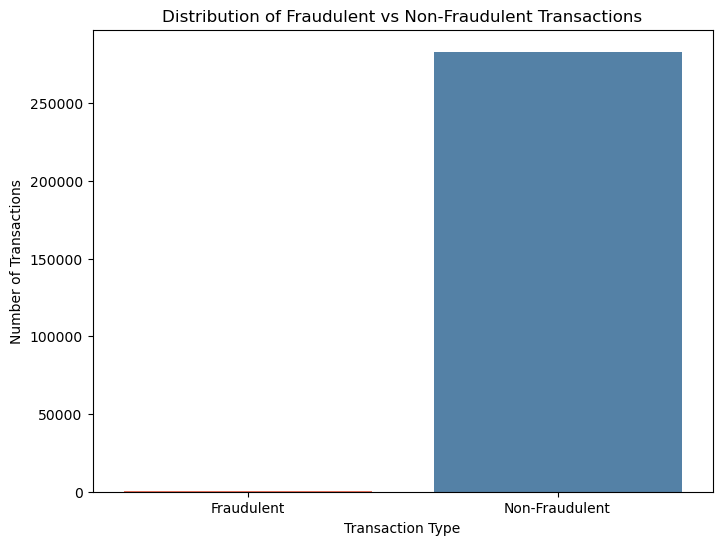

In [37]:
# Define the counts for fraudulent and non-fraudulent transactions
transaction_counts = {'Type': ['Fraudulent', 'Non-Fraudulent'], 'Count': [fraudulent_count, non_fraudulent_count]}

# Convert the dictionary to a pandas DataFrame
transaction_data = pd.DataFrame(transaction_counts)

# Create the bar plot
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.barplot(data=transaction_data, x='Type', y='Count', palette=['#FF6347', '#4682B4'])  # Create the bar plot
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')  # Add a title
plt.xlabel('Transaction Type')  # Label for the x-axis
plt.ylabel('Number of Transactions')  # Label for the y-axis

# Display the plot
plt.show()


**Result Analysis:**

The bar plot clearly illustrates the extreme class imbalance:

The count of fraudulent transactions (492) is significantly smaller compared to non-fraudulent transactions (283,253).
This visual highlights the need to address this imbalance during model training, such as through resampling techniques.

**Another example with percentage**

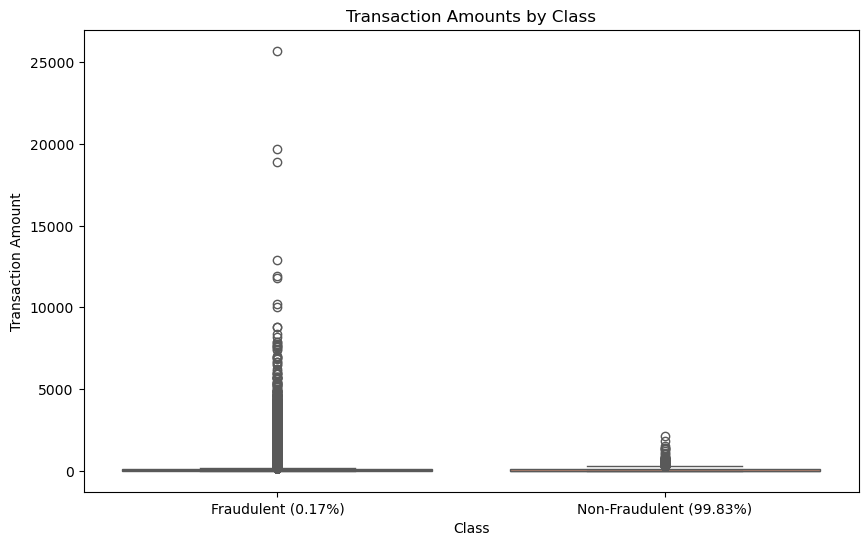

In [24]:
# Calculate the total number of transactions
total_transactions = fraudulent_count + non_fraudulent_count

# Calculate the percentage for fraudulent transactions
fraud_percentage = (fraudulent_count / total_transactions) * 100

# Calculate the percentage for non-fraudulent transactions
non_fraud_percentage = (non_fraudulent_count / total_transactions) * 100

# Create labels for the x-axis with percentages
class_labels = [
    f"Fraudulent ({fraud_percentage:.2f}%)",
    f"Non-Fraudulent ({non_fraud_percentage:.2f}%)"
]

# Plot the boxplot for transaction amounts by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data, palette='Set2')
plt.title("Transaction Amounts by Class")
plt.xlabel("Class")
plt.ylabel("Transaction Amount")

# Add labels with percentages to the x-axis
plt.xticks([0, 1], class_labels)
plt.show()


**What is the distribution of the amounts of fraudulent transactions? (Use a histogram)**

Create a histogram to analyze the distribution of fraudulent transaction amounts.


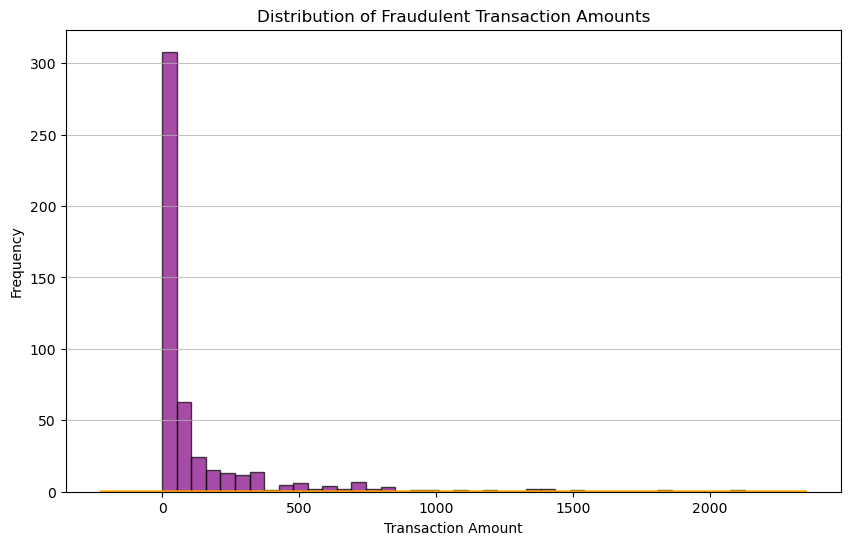

In [38]:

# Filter the dataset to include only fraudulent transactions (Class == 1)
fraud_transactions = data[data['Class'] == 1]

# Set the plot
plt.figure(figsize=(10, 6))
plt.hist(fraud_transactions['Amount'], bins=40, color='purple', edgecolor='black', alpha=0.7)

# Add a density plot for smoother visualization of the distribution
sns.kdeplot(fraud_transactions['Amount'], color='orange', linewidth=2)

# Add title and labels to the plot
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Add gridlines to the y-axis for better readability
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()



**Result Analysis:**  

The histogram shows that most fraudulent transactions involve small amounts, which group around lower values. Only a few transactions have larger amounts, as seen in the tail of the distribution. This plot helps understand how fraudulent transactions are typically distributed.


### Let's Perform Additional Analyses

To better understand the data and explore patterns of fraudulent behavior, I decided to include a few extra analyses beyond the main project tasks. These analyses look at things like when fraudulent transactions happen most often (hourly distribution), spotting transactions over $1000, and finding accounts with the highest number of fraud cases. Even though these don’t directly impact the model training, they give helpful insights and reveal patterns that could guide future approaches to fraud detection and prevention.

### Hourly distribution of fraudulent transactions

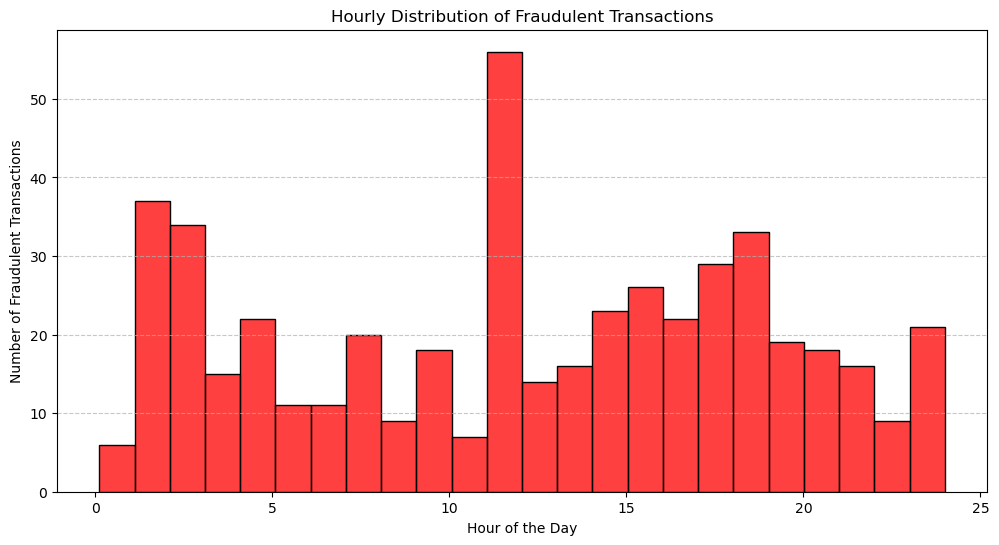

In [28]:
# Add a column for the hour of the day based on the 'Time' column
fraud_transactions['Hour'] = (fraud_transactions['Time'] / 3600) % 24  # Convert seconds to hours modulo 24

# Plot the distribution of fraudulent transactions by hour of the day
plt.figure(figsize=(12, 6)) 
sns.histplot(fraud_transactions['Hour'], bins=24, color='red', kde=False)  # Plot histogram for 24 hours
plt.title("Hourly Distribution of Fraudulent Transactions") 
plt.xlabel("Hour of the Day") 
plt.ylabel("Number of Fraudulent Transactions") 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.show() 


**Result:**

**Peak Hours:**


Peak Hours: Fraudulent transactions peak around hour 12. Moderate activity is also observed during early hours (2-3) and evening hours (18-19).

Low Activity Periods: Hours 6-9 show the least fraudulent activity.

Insights: Fraudulent activity is not evenly distributed throughout the day, possibly influenced by operational patterns or time zones.

**Key Takeaways:**

Focus monitoring efforts during high-risk hours.

Explore patterns linking fraud to specific times or events.

### Fraudulent transactions with amounts greater than $1000


In this analysis, we focus on fraudulent transactions with amounts exceeding $1000. By narrowing our scope to these high-value transactions, we aim to identify patterns and trends that might indicate targeted fraudulent behavior. Additionally, visualizing these transactions helps us understand their distribution.


High-value fraudulent transactions (> $1000): 9
          Time   Amount
6971    9064.0  1809.68
10690  18088.0  1218.89
81609  59011.0  1389.56
89190  62467.0  1402.16
95597  65385.0  1354.25


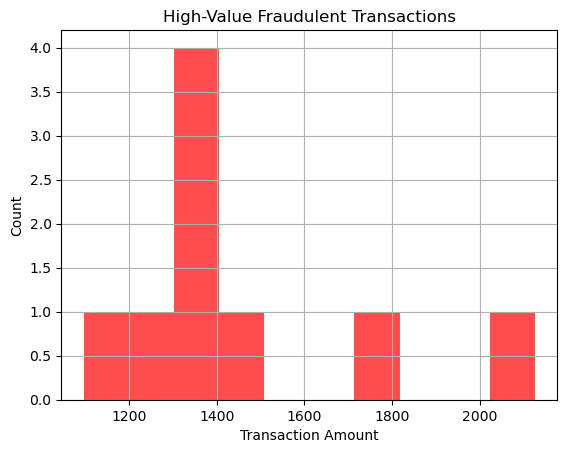

In [29]:

# Filter fraudulent transactions with amounts greater than $1000
high_amount_fraud = fraud_transactions[fraud_transactions['Amount'] > 1000]

# Count and display summary
print(f"High-value fraudulent transactions (> $1000): {len(high_amount_fraud)}")
print(high_amount_fraud[['Time', 'Amount']].head())  # Show only key details

# Plot distribution
plt.hist(high_amount_fraud['Amount'], bins=10, color='red', alpha=0.7)
plt.title("High-Value Fraudulent Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.grid(True)
plt.show()



The dataset contains only 9 fraudulent transactions with amounts greater than $1000. This indicates that high-value fraudulent transactions are relatively rare. The histogram and density plot provide insights into the frequency and patterns of such transactions, which can inform targeted monitoring strategies.



### Accounts (or identifiers) with the highest number of fraudulent transactions

Here, I wanted to see which accounts (or identifiers) were involved in the highest number of fraudulent transactions. This kind of analysis can reveal patterns of repeated fraud and help to focus on accounts that may need further investigation or tighter security measures. 

The bar chart below displays the top 10 accounts with the highest number of fraudulent transactions.


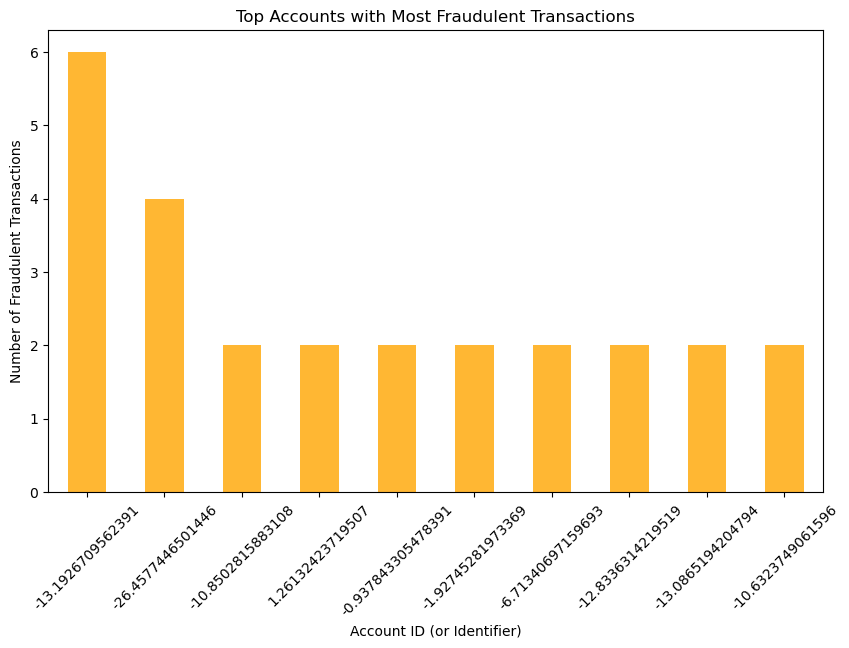

In [30]:

# Analyze accounts with the most fraudulent transactions
fraud_by_account = fraud_transactions['V1'].value_counts().head(10)  # Count occurrences in 'V1' (or account identifier)

# Visualize the top accounts with most fraudulent transactions
fraud_by_account.plot(kind='bar', figsize=(10, 6), color='orange', alpha=0.8)
plt.title("Top Accounts with Most Fraudulent Transactions")
plt.xlabel("Account ID (or Identifier)")
plt.ylabel("Number of Fraudulent Transactions")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**Result:**

The bar chart shows the accounts (or identifiers) with the highest number of fraudulent transactions:

Key Accounts: One account stands out with 6 fraudulent transactions, while another has 4.

Other Accounts: The rest show 2 fraudulent transactions each, still worth attention.

Insights: These accounts may represent organized fraud or compromised systems. Monitoring them can help prevent further fraud and focus resources on high-risk areas.


### Model Development and Evaluation

In this part of the project, I will prepare the data and start building a machine learning model to detect fraudulent transactions.

**Steps in Data Preparation:**

1. Separate Features and Target:


I split the data into features (all columns except Class) and the target (Class), which tells us if a transaction is fraudulent (1) or not (0).

2. Standardize Features:


To make sure the data is scaled properly, I use a standardization technique that centers the data around 0 and scales it to have a standard deviation of 1.

3. Split the Data:


The dataset is divided into two parts: 80% for training the model and 20% for testing it. This helps us evaluate how well the model works on new, unseen data.

4. Check Class Distribution:


After splitting, I check how many fraudulent (1) and non-fraudulent (0) transactions are in the training set. This ensures that the class imbalance in the data is maintained.


In [31]:

# Import train-test split function
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target column

# Standardize the features
from sklearn.preprocessing import StandardScaler  # Scaling tool
scaler = StandardScaler()  # Initialize scaler
X_scaled = scaler.fit_transform(X)  # Standardize the features

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)  # 80% training, 20% testing

# Check and print class distribution
print("Class distribution in y_train after splitting:")
print(y_train.value_counts())  # Show counts of 0 and 1


Class distribution in y_train after splitting:
Class
0    226591
1       405
Name: count, dtype: int64


**Class Distribution in y_train:**


The split shows that the training set has 226,591 non-fraudulent transactions (class 0) and only 405 fraudulent transactions (class 1). This huge imbalance is not surprising, as fraud cases are rare in real-world data.

**Why This Step Is Important:**


Maintaining this imbalance in the training and testing sets is important because it reflects the real-world scenario and ensures the model learns to handle these differences effectively.


**Build and Evaluate Random Forest Classifier**

In this step, I used a RandomForestClassifier to detect fraudulent transactions. Here's how it works:

1. Initialize the Classifier:

I set max_depth=150 to control how deep the decision trees can grow and random_state=42 to get consistent results every time the code runs.

2. Train the Model:

Using rf_model.fit(X_train, y_train), the classifier learns patterns from the training data.

3. Make Predictions:

With rf_model.predict(X_test), the model predicts whether the transactions in the test set are fraudulent or not.

4. Evaluate the Results:

The classification_report gives detailed metrics like precision, recall, and F1-score for each class.
The accuracy_score tells how well the model performs overall.
This step is key to understanding how well the model detects fraud and where it can be improved.


In [32]:

# Import necessary class for Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(max_depth=150, random_state=42)  # Configure max depth and random state

# Train the Random Forest model on training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import classification_report, accuracy_score  # Import evaluation metrics

# Display detailed classification metrics
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))  # Precision, recall, F1-score, and support

# Calculate and display overall accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Compute accuracy
print(f"Accuracy: {accuracy_rf * 100:.2f}%")  # Display accuracy as a percentage


Random Forest Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.93      0.71      0.81        87

    accuracy                           1.00     56749
   macro avg       0.96      0.86      0.90     56749
weighted avg       1.00      1.00      1.00     56749

Accuracy: 99.95%


**Model shows the following performance metrics:**


**Class 0 (Non-Fraudulent Transactions):**


Precision: 1.00 — All predicted non-fraudulent transactions are correct.

Recall: 1.00 — The model correctly identifies all actual non-fraudulent transactions.

F1-Score: 1.00 — Perfect balance between precision and recall.


**Class 1 (Fraudulent Transactions):**


Precision: 0.93 — 93% of predicted fraudulent transactions are correct.

Recall: 0.71 — The model correctly identifies 71% of actual fraudulent transactions.

F1-Score: 0.81 — A balance between precision and recall, reflecting slight difficulty in detecting all fraudulent transactions.


**Accuracy:**


The overall accuracy of the model is 99.95%, indicating that almost all transactions were classified correctly.


**Macro Average:**

Precision: 0.96, Recall: 0.86, F1-Score: 0.90 — Average scores for both classes, showing good performance but still room for improvement in fraud detection.


**Weighted Average:**


Precision: 1.00, Recall: 1.00, F1-Score: 1.00 — These values are heavily influenced by the majority class (non-fraudulent transactions) due to the class imbalance.

### Conclusion

In this project, I developed and evaluated a machine learning model to detect fraudulent credit card transactions. By applying techniques like oversampling to address the class imbalance, I trained a Random Forest classifier that achieved an impressive accuracy of 99.95%.

Although the model performed very well overall, I observed that the recall for fraudulent transactions was lower than expected, which means it missed some fraudulent cases. This suggests that there’s still room for improvement, especially in detecting fraud cases more accurately.

In future work, I could experiment with different models or fine-tune the current one to improve recall and better detect fraudulent transactions. Additionally, exploring further features or applying other techniques could enhance the model’s performance.

Overall, this project gave me valuable experience in data preprocessing, model training, and evaluation, and I’m excited to apply these skills to future projects!